In [1]:
pip install numpy pandas matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [3]:
from datetime import datetime
import yfinance as yf

now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start=start, end=end)
df

C:\Users\Ivan\AppData\Local\Temp\ipykernel_16324\3979220856.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-07-27   27.496407   27.684540   27.350829   27.568076  177822000
2015-07-28   27.633026   27.751730   27.447135   27.633026  134472400
2015-07-29   27.545679   27.659903   27.384423   27.581515  148046800
2015-07-30   27.406822   27.451615   27.259003   27.395623  134513200
2015-07-31   27.167183   27.467298   27.079836   27.458339  171540000
...                ...         ...         ...         ...        ...
2025-07-21  212.479996  215.779999  211.630005  212.100006   51377400
2025-07-22  214.399994  214.949997  212.229996  213.139999   46404100
2025-07-23  214.149994  215.149994  212.410004  215.000000   46989300
2025-07-24  213.759995  215.690002  213.529999  213.899994   46022600
2025-07-25  213.880005  215.240005  213.399994  214.699997   40219700

[2515 rows x 5 columns]

In [4]:
df.columns = df.columns.droplevel(1)

In [5]:
df.shape

(2515, 5)

In [6]:
df.isna().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [7]:
print(df.columns.tolist())

['Close', 'High', 'Low', 'Open', 'Volume']


In [8]:
df.describe()

Price        Close         High          Low         Open        Volume
count  2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03
mean    104.540034   105.587121   103.381231   104.438626  1.087189e+08
std      69.172416    69.846398    68.411292    69.094454  6.375307e+07
min      20.647457    20.951437    20.448617    20.569754  2.323470e+07
25%      39.547609    40.013782    39.070344    39.542804  6.602520e+07
50%      93.826546    94.684396    93.163099    93.991778  9.388620e+07
75%     165.305962   167.176649   163.774506   165.236889  1.321474e+08
max     258.396667   259.474086   257.010028   257.568678  6.488252e+08

In [9]:
df.rename(columns={'Pric Date': 'Index'}, inplace=True)

In [10]:
df.head()

Price           Close       High        Low       Open     Volume
Date                                                             
2015-07-27  27.496407  27.684540  27.350829  27.568076  177822000
2015-07-28  27.633026  27.751730  27.447135  27.633026  134472400
2015-07-29  27.545679  27.659903  27.384423  27.581515  148046800
2015-07-30  27.406822  27.451615  27.259003  27.395623  134513200
2015-07-31  27.167183  27.467298  27.079836  27.458339  171540000

In [11]:
df.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [12]:
df = df.reset_index()
df.head()

Price       Date      Close       High        Low       Open     Volume
0     2015-07-27  27.496407  27.684540  27.350829  27.568076  177822000
1     2015-07-28  27.633026  27.751730  27.447135  27.633026  134472400
2     2015-07-29  27.545679  27.659903  27.384423  27.581515  148046800
3     2015-07-30  27.406822  27.451615  27.259003  27.395623  134513200
4     2015-07-31  27.167183  27.467298  27.079836  27.458339  171540000

In [13]:
print(df.columns.tolist())

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [14]:
df.rename(columns={'Price': 'Index'}, inplace=True)

In [15]:
df.head()

Price       Date      Close       High        Low       Open     Volume
0     2015-07-27  27.496407  27.684540  27.350829  27.568076  177822000
1     2015-07-28  27.633026  27.751730  27.447135  27.633026  134472400
2     2015-07-29  27.545679  27.659903  27.384423  27.581515  148046800
3     2015-07-30  27.406822  27.451615  27.259003  27.395623  134513200
4     2015-07-31  27.167183  27.467298  27.079836  27.458339  171540000

In [16]:
print(df.columns.tolist())

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [17]:
df.head()

Price       Date      Close       High        Low       Open     Volume
0     2015-07-27  27.496407  27.684540  27.350829  27.568076  177822000
1     2015-07-28  27.633026  27.751730  27.447135  27.633026  134472400
2     2015-07-29  27.545679  27.659903  27.384423  27.581515  148046800
3     2015-07-30  27.406822  27.451615  27.259003  27.395623  134513200
4     2015-07-31  27.167183  27.467298  27.079836  27.458339  171540000

Text(0.5, 1.0, 'AAPL')

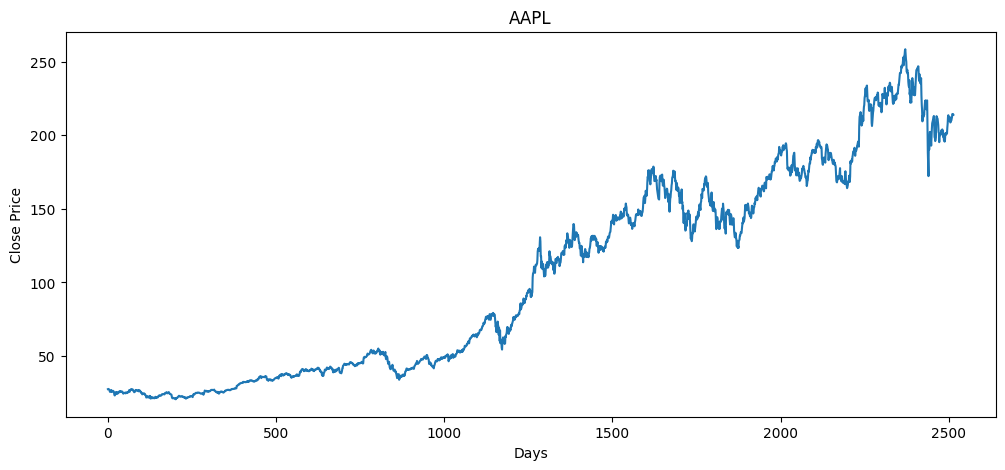

In [18]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title(ticker)

In [19]:
df['MA_100'] = df.Close.rolling(100).mean()

In [20]:
df['MA_100'].head(103)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
98           NaN
99     25.877236
100    25.853837
101    25.823740
102    25.787851
Name: MA_100, Length: 103, dtype: float64

In [21]:
df

Price       Date       Close        High         Low        Open     Volume  \
0     2015-07-27   27.496407   27.684540   27.350829   27.568076  177822000   
1     2015-07-28   27.633026   27.751730   27.447135   27.633026  134472400   
2     2015-07-29   27.545679   27.659903   27.384423   27.581515  148046800   
3     2015-07-30   27.406822   27.451615   27.259003   27.395623  134513200   
4     2015-07-31   27.167183   27.467298   27.079836   27.458339  171540000   
...          ...         ...         ...         ...         ...        ...   
2510  2025-07-21  212.479996  215.779999  211.630005  212.100006   51377400   
2511  2025-07-22  214.399994  214.949997  212.229996  213.139999   46404100   
2512  2025-07-23  214.149994  215.149994  212.410004  215.000000   46989300   
2513  2025-07-24  213.759995  215.690002  213.529999  213.899994   46022600   
2514  2025-07-25  213.880005  215.240005  213.399994  214.699997   40219700   

Price      MA_100  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
2510   208.527555  
2511   208.271103  
2512   208.042711  
2513   207.765078  
2514   207.526695  

[2515 rows x 7 columns]

Text(0.5, 1.0, '100 Days Moving Average')

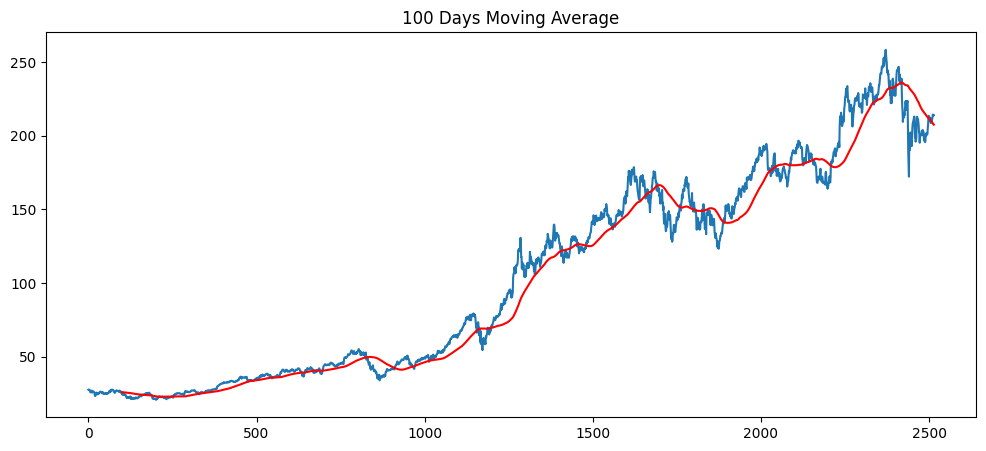

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.title('100 Days Moving Average')

In [23]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price       Close  Percentage Changed
0       27.496407                 NaN
1       27.633026            0.004969
2       27.545679           -0.003161
3       27.406822           -0.005041
4       27.167183           -0.008744
...           ...                 ...
2510   212.479996            0.006156
2511   214.399994            0.009036
2512   214.149994           -0.001166
2513   213.759995           -0.001821
2514   213.880005            0.000561

[2515 rows x 2 columns]

In [24]:
df

Price       Date       Close        High         Low        Open     Volume  \
0     2015-07-27   27.496407   27.684540   27.350829   27.568076  177822000   
1     2015-07-28   27.633026   27.751730   27.447135   27.633026  134472400   
2     2015-07-29   27.545679   27.659903   27.384423   27.581515  148046800   
3     2015-07-30   27.406822   27.451615   27.259003   27.395623  134513200   
4     2015-07-31   27.167183   27.467298   27.079836   27.458339  171540000   
...          ...         ...         ...         ...         ...        ...   
2510  2025-07-21  212.479996  215.779999  211.630005  212.100006   51377400   
2511  2025-07-22  214.399994  214.949997  212.229996  213.139999   46404100   
2512  2025-07-23  214.149994  215.149994  212.410004  215.000000   46989300   
2513  2025-07-24  213.759995  215.690002  213.529999  213.899994   46022600   
2514  2025-07-25  213.880005  215.240005  213.399994  214.699997   40219700   

Price      MA_100  Percentage Changed  
0             NaN                 NaN  
1             NaN            0.004969  
2             NaN           -0.003161  
3             NaN           -0.005041  
4             NaN           -0.008744  
...           ...                 ...  
2510   208.527555            0.006156  
2511   208.271103            0.009036  
2512   208.042711           -0.001166  
2513   207.765078           -0.001821  
2514   207.526695            0.000561  

[2515 rows x 8 columns]

In [25]:
df['MA_200'] = df.Close.rolling(200).mean()
df['MA_200']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2510    221.895808
2511    221.840720
2512    221.781542
2513    221.725944
2514    221.665316
Name: MA_200, Length: 2515, dtype: float64

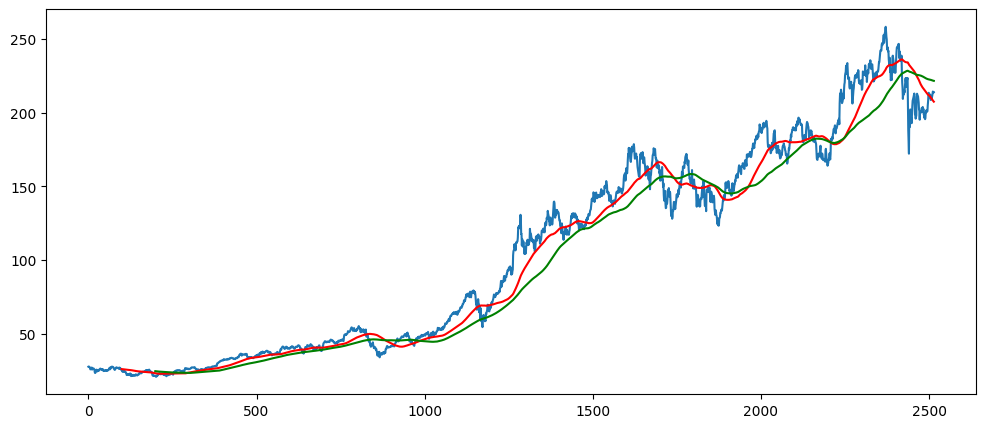

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.plot(df['MA_200'], 'g') # 'r' for red color

In [27]:
df.shape

(2515, 9)

In [28]:
df

Price       Date       Close        High         Low        Open     Volume  \
0     2015-07-27   27.496407   27.684540   27.350829   27.568076  177822000   
1     2015-07-28   27.633026   27.751730   27.447135   27.633026  134472400   
2     2015-07-29   27.545679   27.659903   27.384423   27.581515  148046800   
3     2015-07-30   27.406822   27.451615   27.259003   27.395623  134513200   
4     2015-07-31   27.167183   27.467298   27.079836   27.458339  171540000   
...          ...         ...         ...         ...         ...        ...   
2510  2025-07-21  212.479996  215.779999  211.630005  212.100006   51377400   
2511  2025-07-22  214.399994  214.949997  212.229996  213.139999   46404100   
2512  2025-07-23  214.149994  215.149994  212.410004  215.000000   46989300   
2513  2025-07-24  213.759995  215.690002  213.529999  213.899994   46022600   
2514  2025-07-25  213.880005  215.240005  213.399994  214.699997   40219700   

Price      MA_100  Percentage Changed      MA_200  
0             NaN                 NaN         NaN  
1             NaN            0.004969         NaN  
2             NaN           -0.003161         NaN  
3             NaN           -0.005041         NaN  
4             NaN           -0.008744         NaN  
...           ...                 ...         ...  
2510   208.527555            0.006156  221.895808  
2511   208.271103            0.009036  221.840720  
2512   208.042711           -0.001166  221.781542  
2513   207.765078           -0.001821  221.725944  
2514   207.526695            0.000561  221.665316  

[2515 rows x 9 columns]

In [29]:
# Splitting data into Training and Testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [30]:
data_training.tail(100)

Close
1660  162.274323
1661  160.387436
1662  163.689499
1663  163.365204
1664  160.357925
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[100 rows x 1 columns]

In [31]:
data_testing.tail(100)

Close
2415  235.621017
2416  235.431274
2417  235.021805
2418  238.756912
2419  227.182083
...          ...
2510  212.479996
2511  214.399994
2512  214.149994
2513  213.759995
2514  213.880005

[100 rows x 1 columns]

In [32]:
data_training

Close
0      27.496407
1      27.633026
2      27.545679
3      27.406822
4      27.167183
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[1760 rows x 1 columns]

In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04334828],
       [0.04421297],
       [0.04366013],
       ...,
       [0.80993521],
       [0.82264284],
       [0.83703224]])

In [36]:
data_training_array.shape

(1760, 1)

In [37]:
print(data_training_array)

[[0.04334828]
 [0.04421297]
 [0.04366013]
 ...
 [0.80993521]
 [0.82264284]
 [0.83703224]]


In [38]:
type(data_training_array)

numpy.ndarray

In [39]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    print(data_training_array[i-100: i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

[[0.04334828]
 [0.04421297]
 [0.04366013]
 [0.04278128]
 [0.04126456]
 [0.03721038]
 [0.03182381]
 [0.03290105]
 [0.03325707]
 [0.03381243]
 [0.03979299]
 [0.03092184]
 [0.03341369]
 [0.03328558]
 [0.03443897]
 [0.03614773]
 [0.03520789]
 [0.03308623]
 [0.02972571]
 [0.01991473]
 [0.01615554]
 [0.01703837]
 [0.0255108 ]
 [0.03011019]
 [0.03063702]
 [0.02988233]
 [0.02270565]
 [0.02928433]
 [0.02647908]
 [0.02491273]
 [0.02924157]
 [0.02616584]
 [0.02961179]
 [0.03194708]
 [0.03351341]
 [0.03489463]
 [0.03507978]
 [0.03153411]
 [0.03086488]
 [0.03337102]
 [0.03079366]
 [0.03210369]
 [0.03307199]
 [0.03265905]
 [0.02942666]
 [0.02461377]
 [0.02637944]
 [0.02535422]
 [0.02649338]
 [0.02706297]
 [0.0278176 ]
 [0.02706297]
 [0.02524027]
 [0.02897104]
 [0.02823056]
 [0.0285011 ]
 [0.02625126]
 [0.02860082]
 [0.02743318]
 [0.02841569]
 [0.03132053]
 [0.0313063 ]
 [0.03378395]
 [0.03888166]
 [0.03347071]
 [0.03243123]
 [0.0391522 ]
 [0.04094634]
 [0.03947973]
 [0.04187196]
 [0.04385127]
 [0.04

In [40]:
print(y_train)

[0.02853893 0.0251641  0.02094549 ... 0.80993521 0.82264284 0.83703224]


In [41]:
x_train.shape


(1660, 100, 1)

In [42]:
x_train.ndim

3

In [43]:
y_train.shape

(1660,)

In [44]:
!pip install tensorflow

In [45]:
import tensorflow as tf


In [48]:
# ML Model
from keras.layers import Dense, LSTM, Input
from keras.models import Sequential

In [49]:
model = Sequential()

# Input layer defines the shape of the data the model will receive
# (100, 1) means each input sample is a sequence of 100 time steps, 
# with 1 feature at each time step (e.g., stock closing price)
model.add(Input(shape=(100, 1)))

# First LSTM layer with 128 units, tanh activation function. Tann means Hyperbolic Tangent, this helps the network handle
# both positive and negative values, which is important when you're trying to capture patterns in sequential data.
# We also set return_sequences=True because we want this layer to return the full sequence to the next LSTM layer.
# For example, if you have a sequence of 100 time steps, and you set return_sequences=True, the LSTM layer will produce 
# an output for each of those 100 steps
model.add(LSTM(units=128, activation='tanh', return_sequences=True))

# No return_sequences means this layer outputs a single value summarizing the sequence
# Now at this point, we got the single value summarizing the sequence of output that was generated in the previous layer
model.add(LSTM(units=64))

# A Dense layer is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer. 
# These layers are typically used at the end of a neural network to transform the learned features into the final output.
model.add(Dense(25))
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0396
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.8178e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.5971e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.2220e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.5733e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.6644e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.7264e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.7207e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.7873e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.2151e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.3885e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.0338e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.8086e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.7769e-04
Epoch 15/50
52/52 ━

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [52]:
model.save('keras_model.keras')

In [53]:
data_training.tail(100)

Close
1660  162.274323
1661  160.387436
1662  163.689499
1663  163.365204
1664  160.357925
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[100 rows x 1 columns]

In [54]:
data_testing

Close
1760  151.656937
1761  150.534912
1762  149.206238
1763  154.314255
1764  154.865479
...          ...
2510  212.479996
2511  214.399994
2512  214.149994
2513  213.759995
2514  213.880005

[755 rows x 1 columns]

In [55]:
past_100_days = data_training.tail(100)

In [56]:
past_100_days.head(100)

Close
1660  162.274323
1661  160.387436
1662  163.689499
1663  163.365204
1664  160.357925
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[100 rows x 1 columns]

In [57]:
type(past_100_days)

pandas.core.frame.DataFrame

In [58]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [59]:
final_df.head()

Close
0  162.274323
1  160.387436
2  163.689499
3  163.365204
4  160.357925

In [60]:
final_df.tail(100)

Close
755  235.621017
756  235.431274
757  235.021805
758  238.756912
759  227.182083
..          ...
850  212.479996
851  214.399994
852  214.149994
853  213.759995
854  213.880005

[100 rows x 1 columns]

In [61]:
input_data = scaler.fit_transform(final_df)

In [62]:
input_data.shape

(855, 1)

In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [65]:
x_test.ndim

3

In [66]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [67]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [68]:
print(y_predicted)

[150.17644  151.28612  151.38763  150.69972  151.69818  153.04108
 155.84947  157.82097  158.3494   160.46172  162.11557  162.96538
 163.08308  162.95715  164.4287   165.50412  167.51215  169.44974
 170.5718   171.63992  172.0741   171.08592  168.5521   166.51433
 165.50444  166.13803  164.5764   162.29239  159.77568  157.52284
 156.39981  155.245    154.07732  153.78401  153.32626  153.95486
 156.75865  155.91391  154.85648  153.02533  151.03792  150.88547
 152.1033   152.31442  151.87688  150.63135  149.66585  149.39319
 148.7996   146.03258  142.30595  140.6499   141.10957  142.2347
 143.00331  141.86858  140.5688   139.15294  137.91861  138.36818
 137.95421  138.51675  139.61272  140.61285  141.15431  142.51839
 144.3931   146.77417  147.63393  146.31859  148.18347  149.63065
 149.66466  147.49239  143.55733  140.32231  138.39162  137.58144
 136.13313  138.16441  141.6967   144.3836   146.52568  147.3839
 148.12727  148.72417  148.0074   147.82185  148.11862  147.54506
 145.72618  

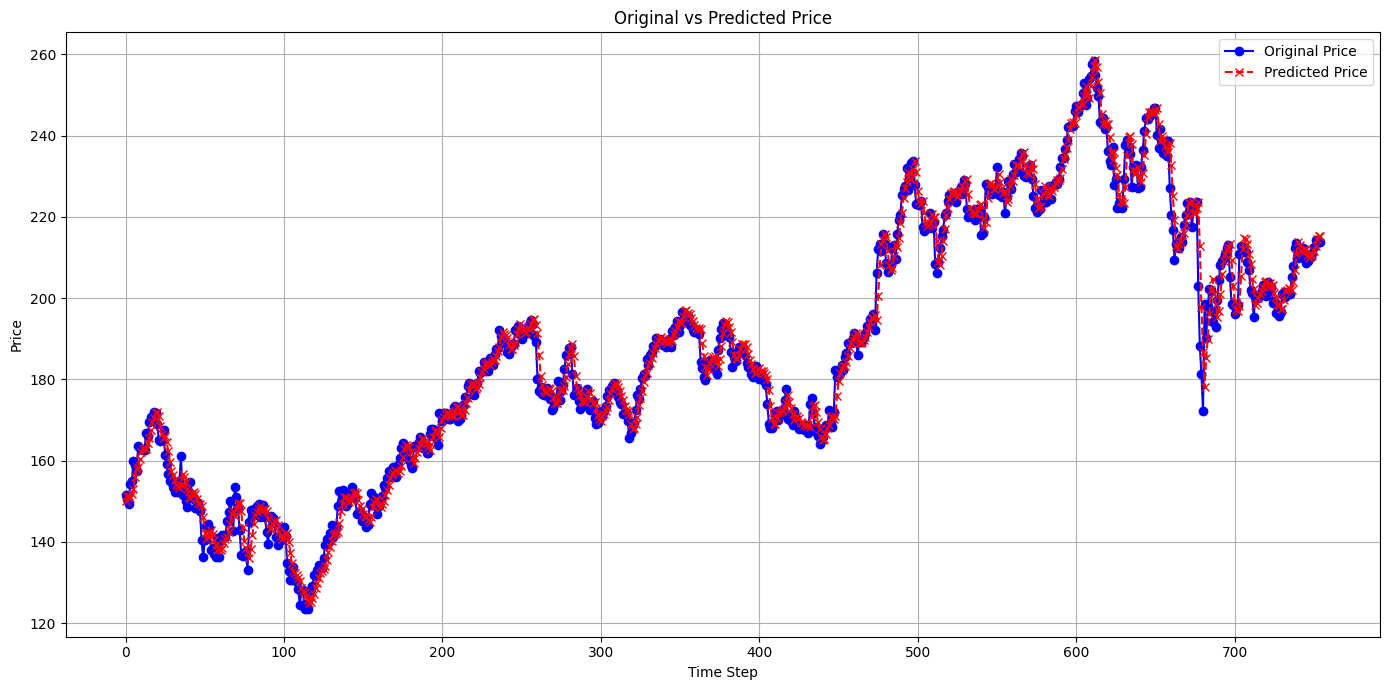

In [69]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Original Price', marker='o', linestyle='-')
plt.plot(y_predicted, color='red', label='Predicted Price', marker='x', linestyle='--')
plt.title("Original vs Predicted Price")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
# MSE
mse = np.mean((y_test - y_predicted) ** 2)
mse

np.float64(14.629457918856838)

In [71]:
# RMSE
rmse = np.sqrt(mse)
rmse

np.float64(3.824847437330911)

In [72]:
# R-Squared
# Calculate SSR (Sum of Squared Residuals)
ssr = np.sum((y_test - y_predicted) ** 2)

# Calculate SST (Total Sum of Squares)
sst = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)
r_squared

np.float64(0.9849587454371248)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 14.629457918856838


In [75]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.824847437330911


In [76]:
r2 = r2_score(y_test, y_predicted)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9849587454371248


In [160]:
data_training.tail(100)

Close
1660  162.274323
1661  160.387436
1662  163.689499
1663  163.365204
1664  160.357925
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[100 rows x 1 columns]

In [161]:
data_testing

Close
1760  151.656937
1761  150.534912
1762  149.206238
1763  154.314255
1764  154.865479
...          ...
2510  212.479996
2511  214.399994
2512  214.149994
2513  213.759995
2514  213.880005

[755 rows x 1 columns]

In [162]:
past_200_days_training = data_training.tail(200)
past_200_days_training

Close
1560  138.299850
1561  139.172104
1562  140.436386
1563  140.054153
1564  139.965988
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[200 rows x 1 columns]

In [163]:
Myfinal_df = pd.concat([past_200_days_training, data_testing], ignore_index=True)

In [164]:
Myfinal_df 

Close
0    138.299850
1    139.172104
2    140.436386
3    140.054153
4    139.965988
..          ...
950  212.479996
951  214.399994
952  214.149994
953  213.759995
954  213.880005

[955 rows x 1 columns]

In [165]:
Myfinal_df.head()

Close
0  138.299850
1  139.172104
2  140.436386
3  140.054153
4  139.965988

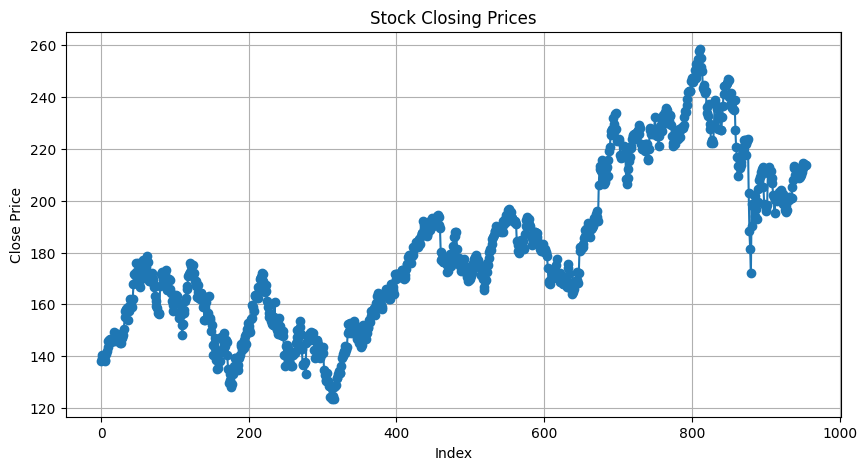

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(Myfinal_df['Close'], marker='o')
plt.title('Stock Closing Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [179]:
input_data_Ivan = scaler.fit_transform(Myfinal_df)

In [180]:
input_data_Ivan.shape

(955, 1)

In [184]:
x_test = []
y_test = []

for i in range(100, input_data_Ivan.shape[0]):
    x_test.append(input_data_Ivan[i-100: i])
    y_test.append(input_data_Ivan[i, 0])

In [185]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(855, 100, 1)
(855,)


In [186]:
x_test.ndim

3

In [187]:
y_predicted = model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [188]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [189]:
print(y_predicted)

[160.64868  161.53917  161.58171  162.61859  163.3968   162.66936
 160.37013  157.81549  158.0093   157.31279  155.38644  152.4509
 151.70097  153.27498  155.42455  158.26091  160.84286  163.69096
 166.05486  168.84857  170.88368  172.22206  174.1697   174.95123
 173.79831  172.5151   173.4085   173.12909  171.45415  170.27457
 168.8857   166.35567  165.28741  166.0323   165.07654  164.01125
 164.15398  164.48161  164.4412   162.58304  161.32982  158.4685
 156.17624  157.25455  156.82353  156.31404  156.4665   159.04115
 158.1273   156.86868  154.09981  152.69864  149.5096   145.75322
 144.39536  143.6657   144.49266  143.07489  140.44989  138.28111
 138.3472   138.34547  138.38603  139.3344   142.00893  144.26962
 145.67639  147.12532  146.2633   145.21054  145.17853  145.23253
 143.71913  140.65274  136.65822  133.7927   132.71565  131.17499
 130.27068  130.87688  131.74745  133.24226  135.47087  137.3559
 137.39665  137.27832  136.415    136.14832  136.8636   138.10344
 140.17732  1

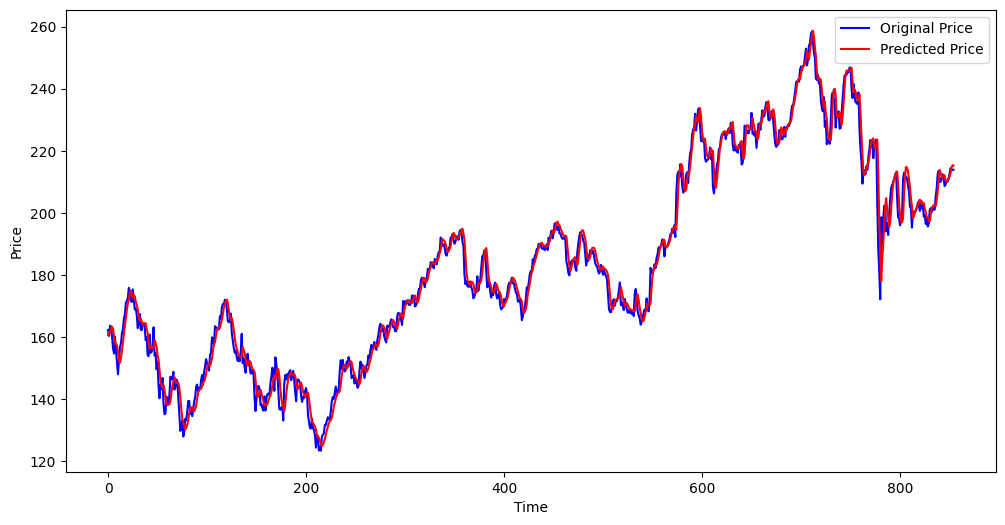

In [190]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
# plt.xlim(500, 700)
# plt.ylim(10, 25)
plt.show()

In [280]:
data_training

Close
0      27.496407
1      27.633026
2      27.545679
3      27.406822
4      27.167183
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[1760 rows x 1 columns]

In [281]:
past_100_days_training=data_training.tail(100)

In [354]:
past_100_days_testing=data_testing.tail(100)

In [355]:
past_100_days_training

Close
1660  162.274323
1661  160.387436
1662  163.689499
1663  163.365204
1664  160.357925
...          ...
1755  147.798798
1756  144.747772
1757  148.615753
1758  150.623535
1759  152.897034

[100 rows x 1 columns]

In [356]:
past_100_days_training.shape

(100, 1)

In [357]:
data_testing

Close
1760  151.656937
1761  150.534912
1762  149.206238
1763  154.314255
1764  154.865479
...          ...
2510  212.479996
2511  214.399994
2512  214.149994
2513  213.759995
2514  213.880005

[755 rows x 1 columns]

In [358]:
data_testing.shape

(755, 1)

In [359]:
Mynewfinal_df = pd.concat([past_100_days_training, data_testing], ignore_index=True)

In [364]:
scaled_last_100 = scaler.transform(past_100_days_testing)

In [365]:
scaled_last_100 .shape

(100, 1)

In [366]:
input_seq = scaled_last_100.reshape(1, 100, 1)

In [367]:
input_seq.shape

(1, 100, 1)

In [368]:
future_predictions = []

for _ in range(7):  # change this to how many days you want to predict
    prediction = model.predict(input_seq, verbose=0)
    predicted_value = prediction[0, 0]
    future_predictions.append(predicted_value)

    # update input_seq: remove first, add predicted at the end
    predicted_reshaped = np.array([[[predicted_value]]]) 
    input_seq = np.append(input_seq[:, 1:, :], predicted_reshaped, axis=1)

In [369]:
future_predictions

[np.float32(0.6783616),
 np.float32(0.68124574),
 np.float32(0.6850017),
 np.float32(0.68907636),
 np.float32(0.69336003),
 np.float32(0.697798),
 np.float32(0.70234305)]

In [370]:
My_predicted = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [371]:
My_predicted

array([214.9834 , 215.3727 , 215.87965, 216.42963, 217.00783, 217.60683,
       218.2203 ], dtype=float32)

In [372]:
type(My_predicted)

numpy.ndarray

In [373]:
type(past_100_days)

pandas.core.frame.DataFrame

In [374]:
df_predicted = pd.DataFrame(My_predicted, columns=['Predicted_Price'])

In [375]:
df_predicted

Predicted_Price
0       214.983398
1       215.372696
2       215.879654
3       216.429626
4       217.007828
5       217.606827
6       218.220306

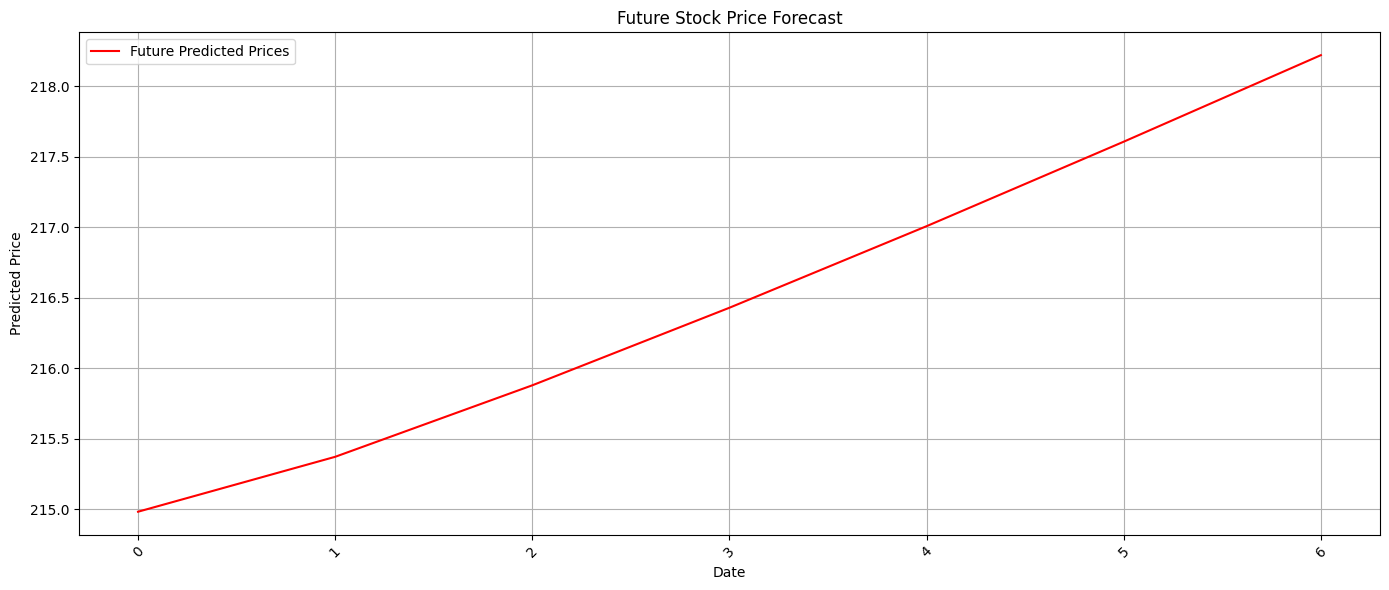

In [382]:
plt.figure(figsize=(14, 6))
plt.plot(df_predicted.index, df_predicted['Predicted_Price'], color='red', label='Future Predicted Prices')

plt.title("Future Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()